# Segmentación

Nuestro objetivo es identificar grupos de pixeles que van juntos.


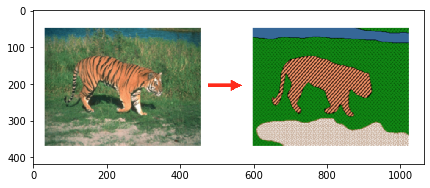

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
im = np.array(Image.open('data/Segmentacion.png'))
plt.figure(figsize=(7, 7))
plt.imshow(im)

Una forma de tratar la segmentación es con la técnica de clustering

## AGRUPAMIENTO (Clustering)

## 1.0 El Problema del Tamaño de una Polera

Considere el caso de una empresa que va a lanzar al mercado un nuevo modelo de poleras. Como la empresa espera 
fabricar modelos en diferentes medidas para satisfacer a personas de todos los tamaños, esta obtiene datos
de la altura y el peso de las personas de la región en donde venderá las poleras, y los grafica en un gráfico, 
como se muestra más abajo.


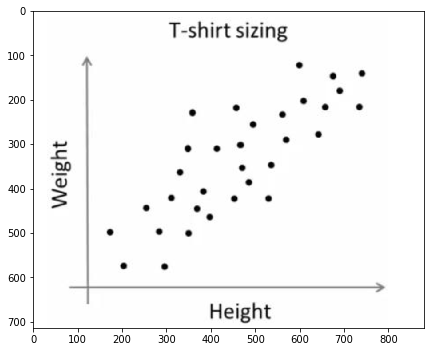

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
im = np.array(Image.open('data/Poleras.png'))
plt.figure(figsize=(7, 7))
plt.imshow(im)

La empresa no puede crear poleras de todos los tamaños. En su lugar, divide a las personas en Pequeñas, 
Medianas y Grandes, y fabrican solo estos 3 modelos que se adaptarán a todas las personas. ¿Cómo
podemos determinar los mejores tamaños considerando los pesos y altura de toda la población?

Se puede resolver este problema mediante un algoritmo de agrupación de personas segun talla y peso 
que proporcionará los mejores grupos que satisfarán a todas las personas. Este algoritmo
va a dividir a la poblacion en k grupos (3 inicialmente en este caso), y si estos k grupos no son suficientes 
para cumplir el objetivo, dividirá los datos de la poblacíon en k+1 más grupos y continuará hasta que la compañia 
esté satisfecha.

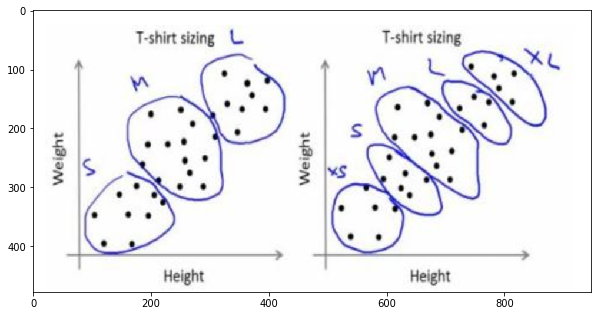

In [7]:
poleras_2 = np.array(Image.open('data/Poleras2.png'))
plt.figure(figsize=(10, 10))
plt.imshow(poleras_2)

## 2.0 K-means

Un algoritmo que nos permite resolver el problema de la polera es K-means.

Para a entender como trabaja considere un conjunto de datos como se muestra a continuación. 


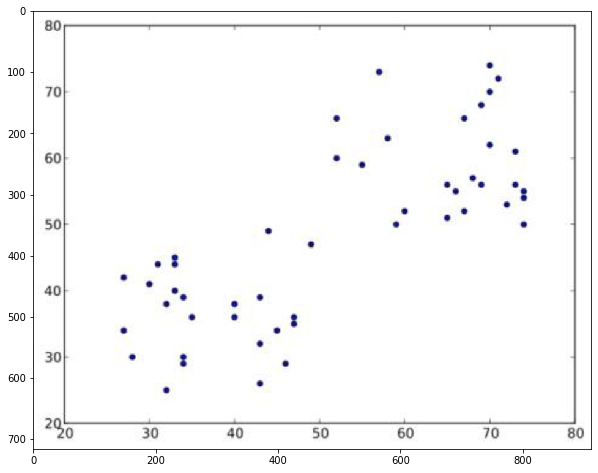

In [8]:
datos_0 = np.array(Image.open('data/k-means0.png'))
plt.figure(figsize=(10, 10))
plt.imshow(datos_0)

- Paso 1: El algoritmo elige aleatoriamente dos centroides, C1 y C2.

- Paso 2: Calcula la distancia desde cada punto a ambos centroides. Si uno de los datose está más cerca de C1, entonces ese dato se etiqueta con '0'. Si está más cerca de C2, se etiquetada como '1'.
Si hay más centroides, los datos son etiquetados como '2', '3', etc.

Para nuestro caso, se grafican los puntos y se colorean todos los '0' con rojo, y todos los '1' con azul, obteniendose lo siguiente:

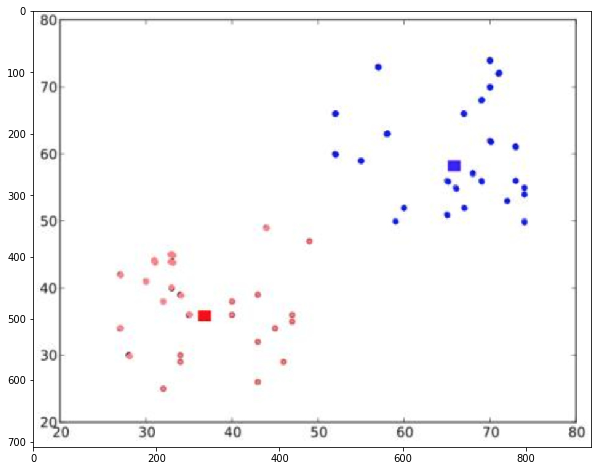

In [9]:
datos_1 = np.array(Image.open('data/k-means1.png'))
plt.figure(figsize=(10, 10))
plt.imshow(datos_1)

- Paso 3: A continuación, se calcula el promedio de todos los puntos azules y rojos por
separado y ese se usara como un nuevo centroide. Es decir, C1 y C2 se desplazan a los centroides 
recién calculados. Y nuevamente se realiza el paso 2 con los nuevos centroides y se etiquete los datos
con '0' y '1'.

Los resultados se visualizan abajo.

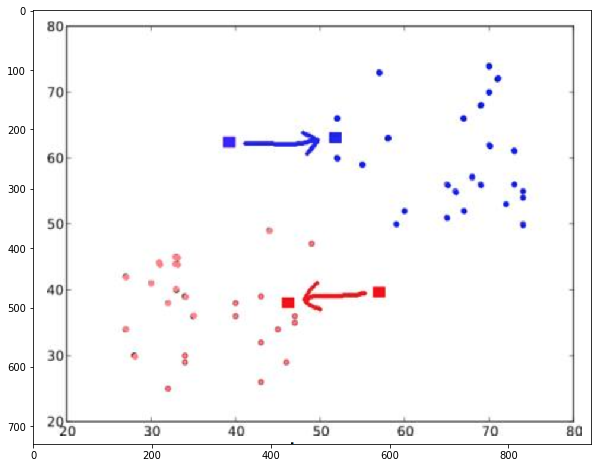

In [10]:
datos_2 = np.array(Image.open('data/k-means2.png'))
plt.figure(figsize=(10, 10))
plt.imshow(datos_2)

Ahora el Paso 2 y el Paso 3 se iteran hasta que ambos centroides convergen en puntos fijos. O hasta que un número máximo de iteraciones se alcanza. 

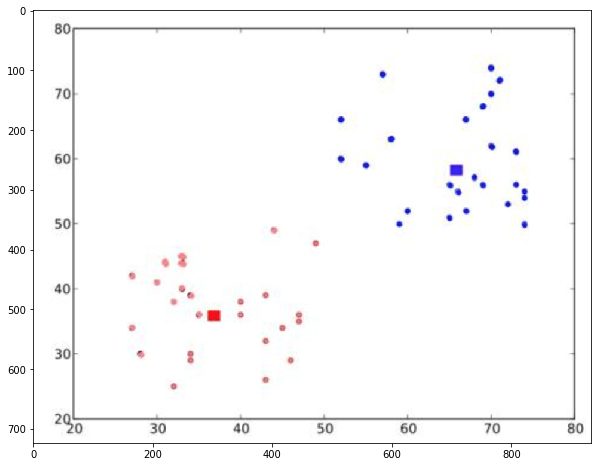

In [11]:
datos_3 = np.array(Image.open('data/k-means3.png'))
plt.figure(figsize=(10, 10))
plt.imshow(datos_3)

En resumen, K-means es un algoritmo de agrupamiento. Su objetivo es particionar n puntos de datos en k clusters. 

Cada uno de los n puntos de datos se asignará a un grupo con la media más cercana. A la media de cada grupo se le llama "centroide" 
o "centro". En general, la aplicación de k-means produce k grupos separados de los n puntos de datos originales. 
Los puntos de datos dentro de un grupo particular se consideran "más similares" entre sí que los puntos de datos que pertenecen a otros grupos.

In [12]:
import numpy as np

#Antes de pasar a los ejemplos es importante mencionar que utilizaremos np.reshape 
#con frequencia

a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [13]:
#Reshape
a.reshape((3, 2))


array([[0, 1],
       [2, 3],
       [4, 5]])

## 3.0 K-means con Scipy

In [14]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

## Ejemplo 1.0

In [15]:
# Genereación de datos
data = vstack((rand(150,2) + array([.5,.5]),rand(150,2)))
data.shape

(300, 2)

In [16]:
data

array([[1.1674145 , 1.02233683],
       [1.11791959, 0.85163727],
       [0.9872746 , 0.7186471 ],
       [1.09663707, 0.87549175],
       [1.19920853, 0.55789727],
       [1.13392653, 0.88612013],
       [1.15493355, 0.68513556],
       [1.44959326, 0.71259032],
       [1.04570714, 1.05506168],
       [1.49578813, 0.70499187],
       [1.33159647, 1.27466634],
       [0.94003648, 0.78952387],
       [1.32202849, 1.39686766],
       [0.58488649, 0.53375711],
       [0.97551887, 1.08956353],
       [1.28318405, 0.64230811],
       [0.88322647, 0.95581622],
       [1.01817016, 1.05709037],
       [1.27659033, 0.7289476 ],
       [1.29390414, 1.30597936],
       [1.42769766, 1.38918337],
       [1.42608113, 1.47176182],
       [0.80022129, 0.69738862],
       [1.24616807, 1.25965224],
       [1.00671938, 1.04324147],
       [1.26738674, 0.93247481],
       [1.48513968, 1.44301269],
       [0.82981528, 0.70370181],
       [1.13017612, 0.79925762],
       [1.01653783, 1.01885729],
       [0.

In [17]:
# Computar K-Means con K = 2 (2 clusters)
centroids,_ = kmeans(data,2)

# Assignar cada punto a un cluster (etiquetando)
idx,_ = vq(data,centroids)

idx.shape


(300,)

In [18]:
idx

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], d

In [19]:
#Todas los puntos (coor x) con label 0
data[idx==0,0]
#Todos los puntos (coor y) con label 0
data[idx==0,1]
#Todos los puntos (coor x) con label 1
data[idx==1,0]
#Todos los puntos (coor y) con label 1
data[idx==1,1]

array([1.02233683, 0.85163727, 0.7186471 , 0.87549175, 0.55789727,
       0.88612013, 0.68513556, 0.71259032, 1.05506168, 0.70499187,
       1.27466634, 0.78952387, 1.39686766, 1.08956353, 0.64230811,
       0.95581622, 1.05709037, 0.7289476 , 1.30597936, 1.38918337,
       1.47176182, 0.69738862, 1.25965224, 1.04324147, 0.93247481,
       1.44301269, 0.70370181, 0.79925762, 1.01885729, 0.94514001,
       1.25576617, 1.19813887, 1.31709969, 1.09700827, 1.36264916,
       0.85110775, 1.41331208, 1.33908206, 0.69284867, 0.50915728,
       0.87888346, 1.42310988, 1.41488624, 1.40353676, 1.48319507,
       1.30723451, 0.84240274, 1.28423569, 0.53532222, 0.69944515,
       1.04258323, 1.35718797, 0.69602422, 1.36830151, 0.69265954,
       0.56549153, 1.0903589 , 0.70887202, 0.88162391, 1.35859405,
       0.60586844, 1.37854308, 1.47953454, 1.08161708, 0.98042041,
       1.00614197, 0.83074223, 0.9890234 , 0.76999339, 1.30251644,
       1.14925784, 0.81071586, 1.24216197, 1.49434439, 1.44986

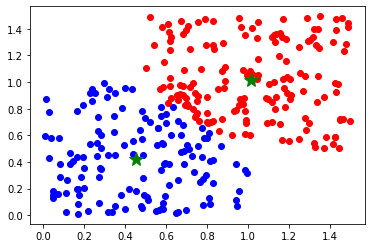

In [20]:
# Graficar los puntos que tienen el id
plot(data[idx==0,0],data[idx==0,1],'ob', data[idx==1,0],data[idx==1,1],'or')

plot(centroids[:,0],centroids[:,1],'*g', markersize=15)

show()

## Ejemplo 2.0

In [21]:
from PIL import Image
from scipy.cluster.vq import *
#from scipy.misc import imresize
from pylab import *


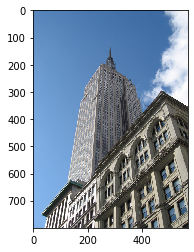

In [22]:
#steps = 50 #Imagen dividida en regiones de steps*steps

im = array(Image.open('data/empire.jpg'))

plt.imshow(im)

In [23]:
print ("Shape:", im.shape)

Shape: (800, 569, 3)


In [24]:
im

array([[[ 88, 133, 188],
        [ 86, 131, 186],
        [ 86, 131, 186],
        ...,
        [247, 248, 250],
        [246, 247, 249],
        [246, 247, 249]],

       [[ 89, 134, 189],
        [ 88, 133, 188],
        [ 88, 133, 188],
        ...,
        [246, 247, 249],
        [246, 247, 249],
        [246, 247, 249]],

       [[ 88, 135, 189],
        [ 87, 134, 188],
        [ 86, 133, 187],
        ...,
        [245, 246, 250],
        [245, 246, 250],
        [246, 247, 251]],

       ...,

       [[130, 177, 231],
        [131, 178, 232],
        [131, 178, 232],
        ...,
        [ 35,  40,  36],
        [ 36,  41,  37],
        [ 35,  41,  37]],

       [[130, 177, 231],
        [131, 178, 232],
        [131, 178, 232],
        ...,
        [ 36,  41,  37],
        [ 39,  44,  40],
        [ 37,  43,  39]],

       [[128, 178, 231],
        [130, 180, 233],
        [128, 178, 231],
        ...,
        [ 37,  42,  38],
        [ 36,  42,  38],
        [ 35,  41,  37]]

In [25]:
# Computar caracteristicas de color por region
im_2 = im.reshape(800 * 569, 3)
im_2

print(im_2.shape)

(455200, 3)


In [26]:
im_2 = im_2.astype('f')/255 #Lo paso float
im_2

array([[0.34509805, 0.52156866, 0.7372549 ],
       [0.3372549 , 0.5137255 , 0.7294118 ],
       [0.3372549 , 0.5137255 , 0.7294118 ],
       ...,
       [0.14509805, 0.16470589, 0.14901961],
       [0.14117648, 0.16470589, 0.14901961],
       [0.13725491, 0.16078432, 0.14509805]], dtype=float32)

In [27]:
# Clusterizacion (numero de clusters k=3)

centroids,_ = kmeans(im_2,5) #Aqui le digo cuantos k quiero (cuantos grupos)

idx,_ = vq(im_2,centroids)

In [28]:
idx.shape

(455200,)

In [29]:
idx

array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

In [30]:
im.shape[:2]

(800, 569)

In [31]:
idx.reshape(im.shape[:2])

array([[4, 4, 4, ..., 2, 2, 2],
       [4, 4, 4, ..., 2, 2, 2],
       [4, 4, 4, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int32)

In [32]:
# Crear imagen con cluster labels

codeim = (idx.reshape(im.shape[:2])).astype(int)

print(codeim.shape)


(800, 569)


In [33]:
codeim 

array([[4, 4, 4, ..., 2, 2, 2],
       [4, 4, 4, ..., 2, 2, 2],
       [4, 4, 4, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

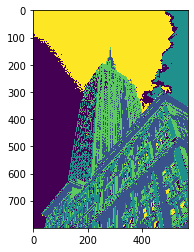

In [34]:
# Visualizando

plt.imshow(codeim)

## 4.0 K-means con Sklearn

## Ejemplo 1.0: Colores Dominantes

Consideremos la imagen de colores que se encuentra encuentra abajo. Una de las preguntas que nos interesa responder hoy es ¿Cuáles son los colores dominantes? ¿Cuáles son los colores que están más representados en la imagen?. Inspeccionando rapidamente la imagen vemos que el fondo es en gran parte amarillo. Y que hay otros cuatro colores que se distribuyen uniformemente.

Ahora si quiesieramos crear un algoritmo para extraer automáticamente estos colores. ¿Cómo lo haríamos?



In [35]:
import matplotlib.pyplot as plt
#import utils
import cv2
import numpy as np


<Figure size 432x288 with 0 Axes>

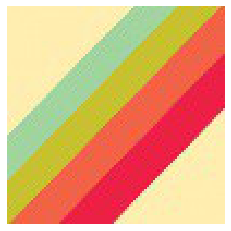

In [36]:
# Cargar la imagen and convertirla de BGR a RGB
image = cv2.imread('data/colore.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
# Desplegarla
plt.clf()
plt.figure()
plt.axis("off")
plt.imshow(image)
plt.show()

Ahora si quiesieramos crear un algoritmo para extraer automáticamente estos colores. ¿Cómo lo haríamos?

Para responder nuestra pregunta de interés, agruparemos las intensidades de píxeles de una imagen RGB. Dada una imagen de tamaño MxN, tenemos píxeles MxN, cada uno de los cuales consta de tres componentes: rojo, verde y azul respectivamente. Trataremos estos píxeles MxN como nuestros puntos de datos y los agruparemos usando k-means. Los píxeles que pertenecen a un clúster dado serán más similares en color que los píxeles que pertenecen a un clúster separado.

El siguiente ejemplo esta adaptado de

https://buzzrobot.com/dominant-colors-in-an-image-using-k-means-clustering-3c7af4622036

In [37]:
# Convertir a una lista de pixeles
print(image.shape)
image_2 = image.reshape((image.shape[0] * image.shape[1], 3))
print(image_2.shape)

(100, 100, 3)
(10000, 3)


In [38]:
#Explorando
image_2[0]

array([255, 238, 176], dtype=uint8)

Notamos que cada una de las dimensiones del arreglo corresponde a un canal. Ahora graficaremos los colores en 3D

<Figure size 432x288 with 0 Axes>

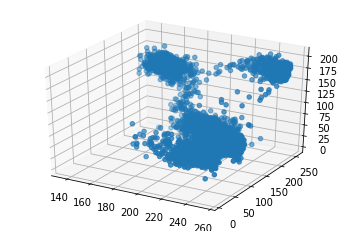

In [39]:
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = image_2[:,0]#Rojo
y = image_2[:,1]#Verde
z = image_2[:,2]#Azul

ax.scatter(x,y,z, marker="o")

plt.show()

Utilizamos la implementación scikit-learn de k-means para evitar tener 
que volver a implementarla.

In [40]:
from sklearn.cluster import KMeans
clt = KMeans(n_clusters = 5)
clt.fit(image_2)

COLORS = clt.cluster_centers_ #Centroides 
#Notamos que los centrides de los clusters nos entregan los colores resprentativos de la imagen
LABELS = clt.labels_


In [41]:
COLORS.astype(int)

array([[240,  98,  70],
       [252, 237, 175],
       [162, 211, 157],
       [199, 191,  48],
       [234,  32,  68]])

In [42]:
#Explorando 
image_2

array([[255, 238, 176],
       [255, 238, 176],
       [255, 237, 175],
       ...,
       [255, 237, 175],
       [255, 237, 175],
       [255, 237, 175]], dtype=uint8)

Usemos Pandas para hacer la visualizacion más facil

In [43]:
import pandas as pd
df_image=pd.DataFrame({'r': image_2[:,0], 'g': image_2[:,1], 'b': image_2[:,2]})
df_image=df_image[['r','g','b']]
df_image

,r,g,b
0,255,238,176
1,255,238,176
2,255,237,175
3,255,237,175
4,255,237,175
...,...,...,...
9995,255,237,175
9996,255,237,175
9997,255,237,175
9998,255,237,175


In [44]:
#Quiero saber los colores dominantes
COLORS.astype(int)

array([[240,  98,  70],
       [252, 237, 175],
       [162, 211, 157],
       [199, 191,  48],
       [234,  32,  68]])

In [45]:
colors_labels=COLORS[LABELS]
colors_labels=colors_labels.astype(int)
colors_labels

array([[252, 237, 175],
       [252, 237, 175],
       [252, 237, 175],
       ...,
       [252, 237, 175],
       [252, 237, 175],
       [252, 237, 175]])

In [46]:
#Me voy a asegurar que los canales esten en el orden que yo quiero

df_image=df_image[['r','g','b']]

#Voy a agregar los centroides de los cluster, es decir los colores representativos

df_c=pd.DataFrame({'r_c': colors_labels[:,0], 'g_c': colors_labels[:,1], 'b_c': colors_labels[:,2]})
df_c=df_c[['r_c','g_c','b_c']]

#Concateno los canales y sus centroides o colores representativos
df_final = pd.concat([df_image, df_c], axis=1)
df_final

,r,g,b,r_c,g_c,b_c
0,255,238,176,252,237,175
1,255,238,176,252,237,175
2,255,237,175,252,237,175
3,255,237,175,252,237,175
4,255,237,175,252,237,175
...,...,...,...,...,...,...
9995,255,237,175,252,237,175
9996,255,237,175,252,237,175
9997,255,237,175,252,237,175
9998,255,237,175,252,237,175


In [47]:
df_final["LABEL"] = pd.Series(LABELS, index=df_image.index)
df_final['LABEL'].value_counts()

1    3110
0    2042
3    1822
4    1620
2    1406
Name: LABEL, dtype: int64

In [48]:
df_final

,r,g,b,r_c,g_c,b_c,LABEL
0,255,238,176,252,237,175,1
1,255,238,176,252,237,175,1
2,255,237,175,252,237,175,1
3,255,237,175,252,237,175,1
4,255,237,175,252,237,175,1
...,...,...,...,...,...,...,...
9995,255,237,175,252,237,175,1
9996,255,237,175,252,237,175,1
9997,255,237,175,252,237,175,1
9998,255,237,175,252,237,175,1


Quiero una función que me permita pasar de los valores rgb al codigo HTML para usarlo en un gráfico

### Formato de los códigos HTML

Cada código HTML usa el símbolo '#' y 6 letras o números. Los dos primeros símbolos del código 
representan la intensidad del color rojo. 00 es el menos intenso y FF es el más intenso. 
El tercer y el cuarto número representan la intensidad del verde y el quinto y el sexto 
representan la intensidad del azul. Así, con esta combinación de la intensidad del rojo,
verde y azul podemos mezclar cualquier color que deseemos de corazón.

### Ejemplos

#FF0000 - Indica máxima cantidad de rojo y nada de verde ni de azul. 

#00FF00 - Indica solo el verde y nada de rojo ni de azul.      

#0000FF - Indica solo el azul y nada de rojo ni de verde. 

In [49]:
#Definimos una funcion que lea valores rgb y entregue el nombre del color 
def rgb_to_hex(r,g,b):
    return '#%02x%02x%02x' % (r,g,b)

In [50]:
#Probamos la funcion
rgb_to_hex(255,238,176)

'#ffeeb0'

In [51]:
#Agregamos una columna con el color que pintaremos cada marcador
df_final['COLOR'] = df_final.apply(lambda row: rgb_to_hex(row['r_c'], row['g_c'], row['b_c']), axis=1)
df_final

,r,g,b,r_c,g_c,b_c,LABEL,COLOR
0,255,238,176,252,237,175,1,#fcedaf
1,255,238,176,252,237,175,1,#fcedaf
2,255,237,175,252,237,175,1,#fcedaf
3,255,237,175,252,237,175,1,#fcedaf
4,255,237,175,252,237,175,1,#fcedaf
...,...,...,...,...,...,...,...,...
9995,255,237,175,252,237,175,1,#fcedaf
9996,255,237,175,252,237,175,1,#fcedaf
9997,255,237,175,252,237,175,1,#fcedaf
9998,255,237,175,252,237,175,1,#fcedaf


In [52]:
#Usamos la columna color y creamos una lista para usarla en un grafico
colors = list(df_final['COLOR'])
colors

['#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#fcedaf',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#a2d39d',
 '#c7bf30',
 '#c7bf30',
 '#c7bf30',
 '#c7bf30',
 '#c7bf30',
 '#c

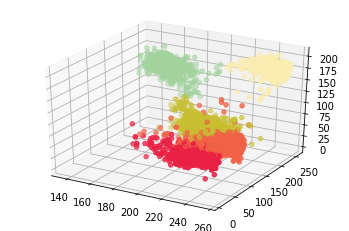

In [53]:
#Graficamos en 3D con los colores correctos
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df_final['r'].astype(int)
y = df_final['g'].astype(int)
z = df_final['b'].astype(int)

ax.scatter(x,y,z, marker="o", color=colors)

plt.show()

El algoritmo k-means asigna cada píxel de nuestra imagen al clúster más cercano. 
Vamos a tomar el numero de  grupos y luego crearemos un histograma de la cantidad de píxeles 
asignados a cada grupo.


In [54]:
def plotHistogram(n_clusters, labels, colors):
    #L form 0 hasta no. de clusters
    numLabels = np.arange(0, n_clusters+1)
       
    #Creando tabla de frecuencias 
    (hist, _) = np.histogram(labels, bins = numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
        
        
    #Descending order sorting as per frequency count
    colors = colors[(-hist).argsort()]
    hist = hist[(-hist).argsort()] 
        
    #Creando un chart vacio
    chart = np.zeros((50, 500, 3), np.uint8)
    start = 0
        
    #Creando rectangulos de colores
    for i in range(n_clusters):
        end = start + hist[i] * 500
            
        #Obtener los valores rgb
        r = colors[i][0]
        g = colors[i][1]
        b = colors[i][2]
            
        #Usando cv2.rectangle para dibujar
        cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
        start = end	
        
    #Desplegar
    plt.figure()
    plt.axis("off")
    plt.imshow(chart)
    plt.show()

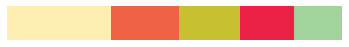

In [55]:
plotHistogram(5, LABELS, COLORS)

En esencia, todo lo que plotHistogram está haciendo es contar la cantidad de píxeles que 
pertenecen a cada grupo.

In [56]:
## Ejemplo 2.0: Compresion de Colores

El objetivo de este ejercicio es reducir el número de colores necesarios para mostrar una imagen del palacio 
de verano (China) de 16.777.216 colores a 16, conservando la calidad de apariencia general.

<Figure size 432x288 with 0 Axes>

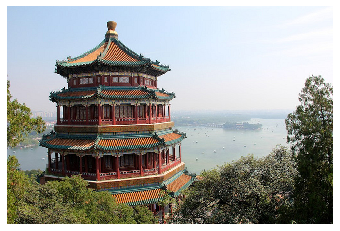

In [57]:
from sklearn.datasets import load_sample_image
china = cv2.imread('data/china.jpg')
china = cv2.cvtColor(china, cv2.COLOR_BGR2RGB)
 
# Desplegarla
plt.clf()
plt.figure()
plt.axis("off")
plt.imshow(china)
plt.show()


In [58]:
china.shape

(427, 640, 3)

In [59]:
#china_2 = china / 255.0 # Colores entre 0...1
china_2 = china
china_2 = china_2.reshape(427 * 640, 3)
china_2.shape

(273280, 3)

In [60]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(china_2)
new_colors = kmeans.cluster_centers_[kmeans.predict(china_2)]
new_colors

array([[190.99910047, 213.56663438, 239.1810822 ],
       [190.99910047, 213.56663438, 239.1810822 ],
       [190.99910047, 213.56663438, 239.1810822 ],
       ...,
       [ 42.19652142,  37.71651399,  28.3226665 ],
       [ 15.90007462,  14.4324089 ,   8.33136426],
       [ 15.90007462,  14.4324089 ,   8.33136426]])

In [61]:
china_recolored = new_colors.reshape(china.shape)
china_recolored.shape
china_recolored =np.uint8(china_recolored)

In [62]:
china_recolored

array([[[190, 213, 239],
        [190, 213, 239],
        [190, 213, 239],
        ...,
        [240, 244, 251],
        [240, 244, 251],
        [240, 244, 251]],

       [[190, 213, 239],
        [190, 213, 239],
        [190, 213, 239],
        ...,
        [240, 244, 251],
        [240, 244, 251],
        [240, 244, 251]],

       [[190, 213, 239],
        [190, 213, 239],
        [190, 213, 239],
        ...,
        [240, 244, 251],
        [240, 244, 251],
        [240, 244, 251]],

       ...,

       [[ 89,  55,  29],
        [138, 127,  83],
        [112,  98,  47],
        ...,
        [ 42,  37,  28],
        [ 15,  14,   8],
        [ 15,  14,   8]],

       [[112,  98,  47],
        [112,  98,  47],
        [112,  98,  47],
        ...,
        [ 15,  14,   8],
        [ 15,  14,   8],
        [ 15,  14,   8]],

       [[112,  98,  47],
        [112,  98,  47],
        [112,  98,  47],
        ...,
        [ 42,  37,  28],
        [ 15,  14,   8],
        [ 15,  14,   8]]

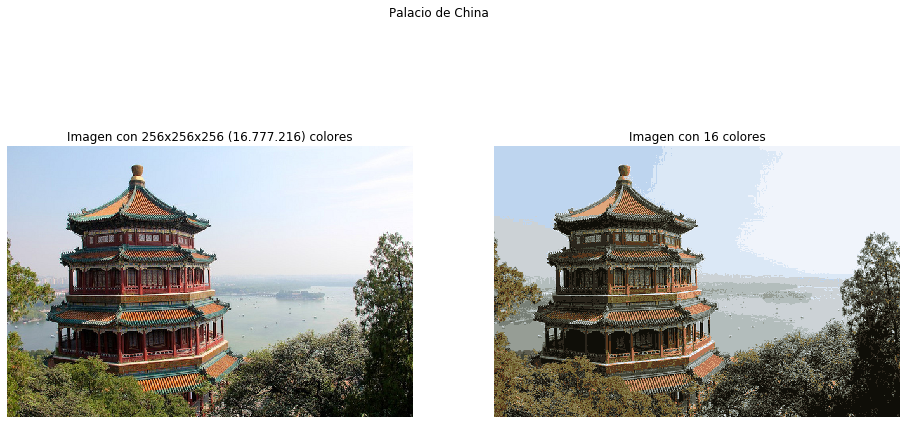

In [63]:
#Desplegando imagenes
plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter
plt.close("all")
plt.figure()
plt.suptitle("Palacio de China")
ax = plt.subplot("121")
ax.axis("off")
ax.imshow(china)
ax.set_title("Imagen con 256x256x256 (16.777.216) colores")

ax = plt.subplot("122")
ax.axis("off")
ax.imshow(china_recolored)
ax.set_title("Imagen con 16 colores")
plt.show()

In [64]:
## 4.1 K-Means con OpenCV

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('data/china.jpg')

Z = img.reshape((-1,3)) #Otra forma sin darle el numero de filas y columnas

#Convertira a np.float32
Z = np.float32(Z)

In [66]:
#Definir criterio
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#Definir k (no de clusters)
K = 16

In [67]:
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [68]:
center #Nos entrega los colores (16)

array([[116.0458   , 160.19763  , 226.40536  ],
       [ 73.98251  , 102.983765 , 178.17862  ],
       [  7.4761825,  13.298472 ,  14.302721 ],
       [183.22746  , 186.07063  , 175.69029  ],
       [127.54455  , 154.82529  , 167.85608  ],
       [ 49.838055 ,  76.07582  ,  93.26267  ],
       [ 43.178497 ,  57.744038 ,  61.859444 ],
       [238.64192  , 216.59845  , 197.24266  ],
       [207.89967  , 205.98117  , 200.73303  ],
       [ 24.756569 ,  33.47622  ,  40.091713 ],
       [ 48.87138  , 108.51436  , 114.84667  ],
       [ 90.50457  ,  96.66246  ,  86.751686 ],
       [ 83.01878  , 113.135506 , 121.24789  ],
       [111.26756  , 132.55347  , 132.0991   ],
       [157.21268  , 157.21777  , 140.20221  ],
       [249.2024   , 240.98276  , 234.76335  ]], dtype=float32)

In [69]:
#Convertir de vuelta a uint8 y crear la imagen
center = np.uint8(center)
center

array([[116, 160, 226],
       [ 73, 102, 178],
       [  7,  13,  14],
       [183, 186, 175],
       [127, 154, 167],
       [ 49,  76,  93],
       [ 43,  57,  61],
       [238, 216, 197],
       [207, 205, 200],
       [ 24,  33,  40],
       [ 48, 108, 114],
       [ 90,  96,  86],
       [ 83, 113, 121],
       [111, 132, 132],
       [157, 157, 140],
       [249, 240, 234]], dtype=uint8)

In [70]:
res = center[label.flatten()]
res

array([[238, 216, 197],
       [238, 216, 197],
       [238, 216, 197],
       ...,
       [ 24,  33,  40],
       [  7,  13,  14],
       [  7,  13,  14]], dtype=uint8)

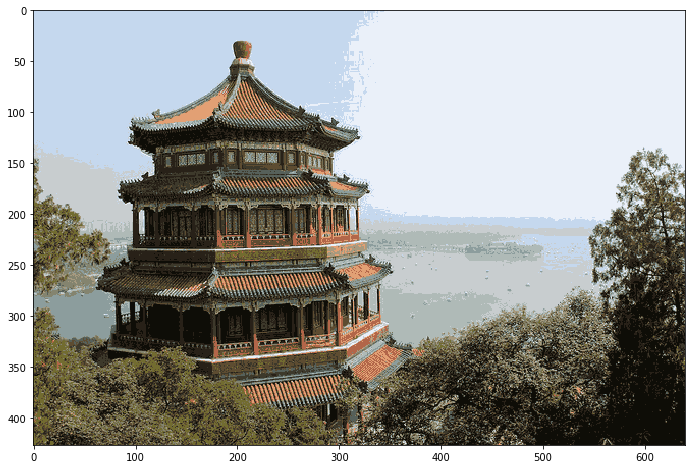

In [71]:
res2 = res.reshape((img.shape))

plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.show()


## 4.2 Agrupamiento Jerarquico (Hierarchical Clustering)

El agrupamiento jerárquico es un tipo de algoritmo de aprendizaje automático no supervisado 
que se utiliza para agrupar puntos de datos sin etiquetar. Al igual que K-means, la agrupación
jerárquica también agrupa los puntos de datos con características similares. 

En algunos casos, el resultado de la agrupación jerárquica y K-Means puede ser similares.

La idea del aglomeramiento jerarquico es construir un árbol de similitud basado en 'distancias' 
por pares. 

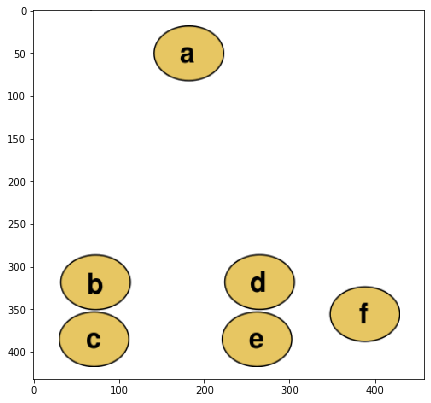

In [72]:
dendo = np.array(Image.open('data/Elementos.png'))
plt.figure(figsize=(7, 7))
plt.imshow(dendo)

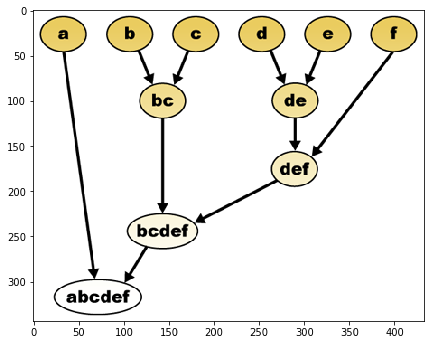

In [73]:
dendo = np.array(Image.open('data/Dendograma.png'))
plt.figure(figsize=(7, 7))
plt.imshow(dendo)

El algoritmo comienza con la agrupación de los dos objetos 'más cercanos' (según la distancia entre vectores de características) y crea un nodo promedio en un árbol con los dos objetos como hijos. Luego busca el siguiente par 'más cercano' entre los objetos restantes y calcula el siguiente nodo promedio, y así sucesivamente.

Luego se pueden extraer grupos atravesando este árbol y deteniéndose en nodos con una distancia menor a algún umbral que luego determina el tamaño de cluster y el número de clusters.

El algoritmo puede utilizar diferentes metricas de distancia tales como la distancia euclideana o la distancia euclideana al cuadrado o ser reemplazado por un criterio más complicado (https://es.wikipedia.org/wiki/Agrupamiento_jer%C3%A1rquico).

In [74]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from skimage.data import coins
from skimage.transform import rescale
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering


(303, 384)

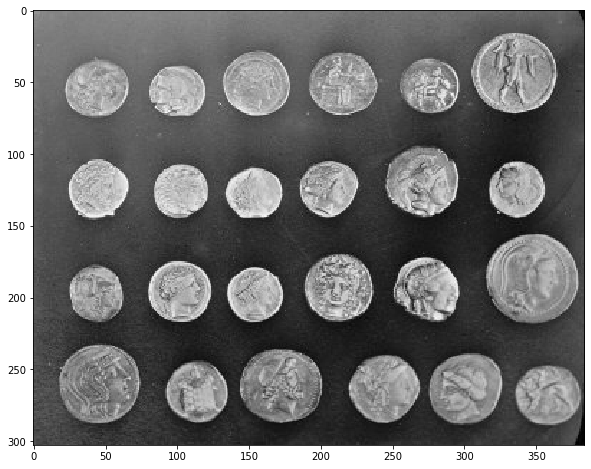

<Figure size 360x360 with 0 Axes>

In [75]:
#Generando datos (coins esta includio en sklearn)
orig_coins = coins()
plt.imshow(orig_coins, cmap=plt.cm.gray)
plt.figure(figsize=(5, 5))
orig_coins.shape

(303, 384)


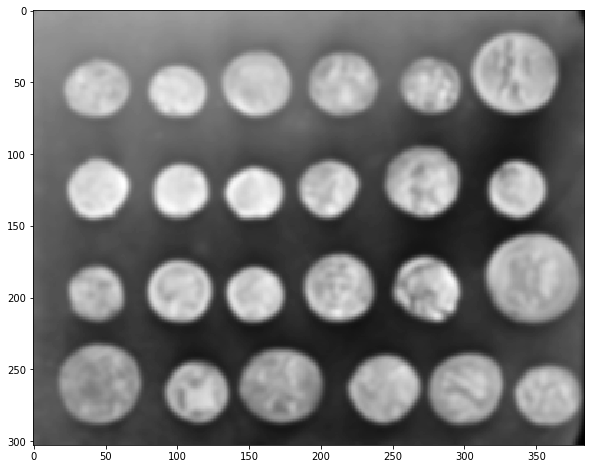

In [76]:
# Aplicamos un filtro gausseano para suavizar
smoothened_coins = gaussian_filter(orig_coins, sigma=2)
print(smoothened_coins.shape)
plt.imshow(smoothened_coins, cmap=plt.cm.gray)

(61, 77)


array([[0.5057926 , 0.51372674, 0.50980392, ..., 0.37248598, 0.32509487,
        0.15272368],
       [0.50588235, 0.50215365, 0.50215365, ..., 0.35692202, 0.32526101,
        0.23814825],
       [0.49443909, 0.49051752, 0.48659595, ..., 0.34529216, 0.33325694,
        0.30913349],
       ...,
       [0.28627451, 0.28980451, 0.28627451, ..., 0.2817205 , 0.27035279,
        0.14040627],
       [0.28649284, 0.27824227, 0.27823851, ..., 0.2785587 , 0.25398147,
        0.0936046 ],
       [0.29015767, 0.26660363, 0.27058824, ..., 0.28627451, 0.21093648,
        0.05083971]])

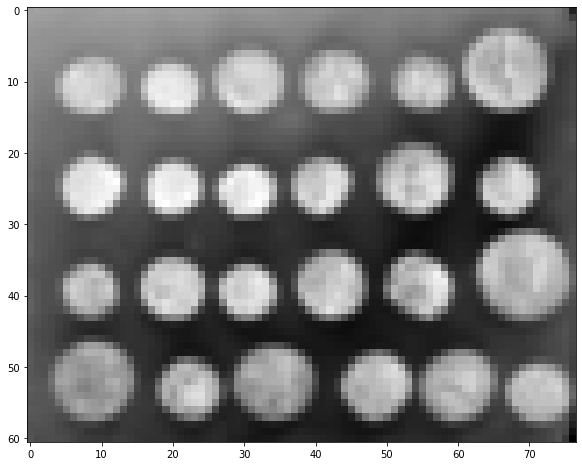

In [77]:
# Reducir el tamaño de la imagen aun 20% de la original para reducir el tiempo de proecesamientorescaled_coins= rescale(smoothened_coins, 0.2, mode="reflect")
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect")
plt.imshow(rescaled_coins, cmap=plt.cm.gray)
print(rescaled_coins.shape)
rescaled_coins

In [78]:
X = np.reshape(rescaled_coins, (-1, 1)) #En vez de calcular nosotros las dimensiones de 
#la imagen actual y entregrarselas a reshape podemos usar -1 como parametro y el algoritmo 
#lo hará por nosotros. 

X.shape

(4697, 1)

In [79]:
X

array([[0.5057926 ],
       [0.51372674],
       [0.50980392],
       ...,
       [0.28627451],
       [0.21093648],
       [0.05083971]])

In [80]:
# Compute clustering
print("Compute structured hierarchical clustering...")

n_clusters = 28 #Numero de clusters

connectivity = grid_to_graph(*rescaled_coins.shape) #Convierto mi imagen en un grafo de acuerdo 
#a la relacion entre los pixeles

#Para entender el metodo de war revisar https://es.wikipedia.org/wiki/M%C3%A9todo_de_Ward

#Otro buen link http://gael-varoquaux.info/scikit-learn-tutorial/unsupervised_learning.html

ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',connectivity=connectivity)

ward.fit(X)

Compute structured hierarchical clustering...


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int64'>'
	with 23209 stored elements in COOrdinate format>,
                        distance_threshold=None, linkage='ward', memory=None,
                        n_clusters=28, pooling_func='deprecated')

In [81]:
#Generando los labels para cada pixel
label = np.reshape(ward.labels_, rescaled_coins.shape)

label.shape


(61, 77)

In [82]:
print("Number of pixels: ", label.size)

print("Number of clusters: ", np.unique(label).size)

Number of pixels:  4697
Number of clusters:  28


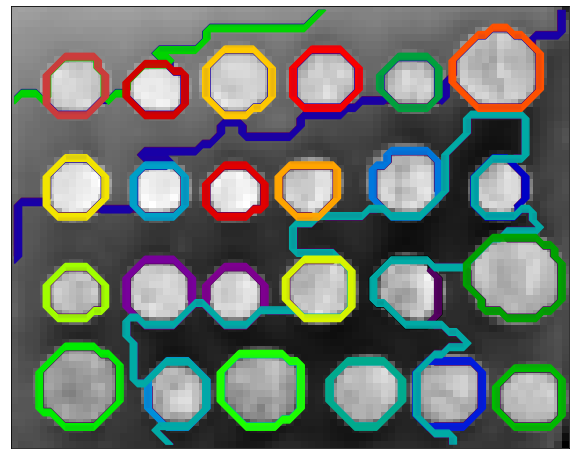

In [83]:
# Dibujar los resultados
plt.figure(figsize=(10, 10))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)

for l in range(n_clusters):
    plt.contour(label == l,colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()


# 5.0 Aplicaciones de Clustering

In [84]:
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt

from osgeo import gdal
import gdal

Para este ejercicio vamos a trabajar con una imagen satelital multiespectral proveniente de Sentinel-2.

Sentinel-2 es un programa de observación terrestre desarrollada por la ESA para proveer imagenes terrestres que permitan monitorear la evolución de las zonas de vegetación, suelo, agua para estudios científicos y para la gestión de los desastres naturales. Está compuesto por dos satélites Sentinel-2A y Sentinel-2B.

El primer satélite, el Sentinel-2A se lanzó 2015 y Sentinel-2B se lanzó en marzo del 2017.

Fuente * https://www.esa.int/Our_Activities/Observing_the_Earth/Copernicus/Sentinel-2

La imagen para trabajar en esta oportunidad corresponde a una imagen tomada en la banda infrarroja (Banda 8 del satellite) de la Bahía de Gibraltar en España con la que trabajaremos utilizando librería GDAL.

Este ejemplo ha sido adaptado de https://medium.com/@h4k1m0u/clustering-a-satellite-image-with-scikit-learn-14adb2ca3790

## 5.1 Geospatial Data Abstraction Library (GDAL)
Es una libreria de datos geoespaciales (datos espaciales georreferenciados) desarrollada la Open Source Geospatial Foundation.

In [85]:
dataset = gdal.Open('data/kmeans-b8.tif') #Abrir la imagen
band = dataset.GetRasterBand(1) #Seleccionar la banda 1

In [86]:
img = band.ReadAsArray()  #Pasarlo a un arreglo

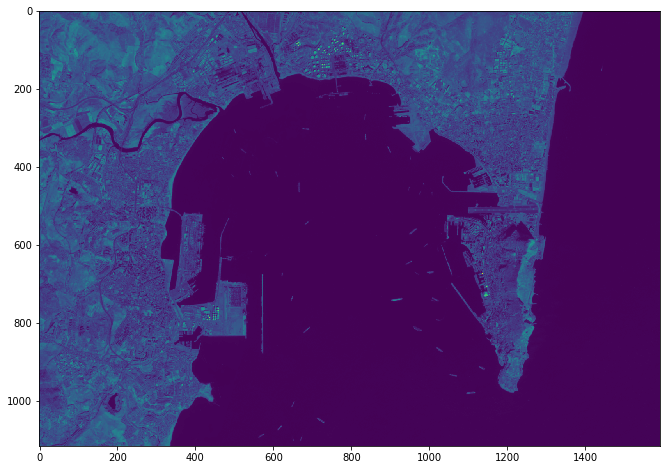

In [87]:
plt.imshow(img)
plt.show()

In [88]:
X = img.reshape((-1, 1)) #Pasar a una dimensión
X

array([[2268],
       [2696],
       [2471],
       ...,
       [ 156],
       [ 150],
       [ 152]], dtype=uint16)

In [89]:
k_means = cluster.KMeans(n_clusters=2) #Clusterizar
_ = k_means.fit(X)

In [90]:
X_clustered = k_means.labels_ #Extraer los labels
X_clustered = X_clustered.reshape(img.shape) #Pasar a dos dimensiones para graficar

In [91]:
X_clustered

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)

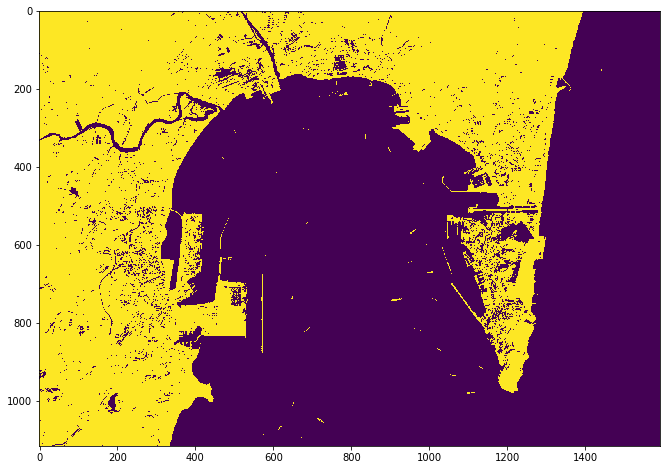

In [92]:
plt.imshow(X_clustered)
plt.show()

## 6.0 CONTORNOS

Otra forma de tratar la segmentación es a través de la detección de contornos. Los contornos son bordes cerrados.

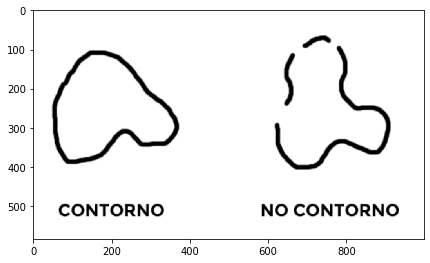

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
im = np.array(Image.open('data/Contornos.png'))
plt.figure(figsize=(7, 7))
plt.imshow(im)

## 6.1 Contando Objetos
## Ejemplo 6.1.1 

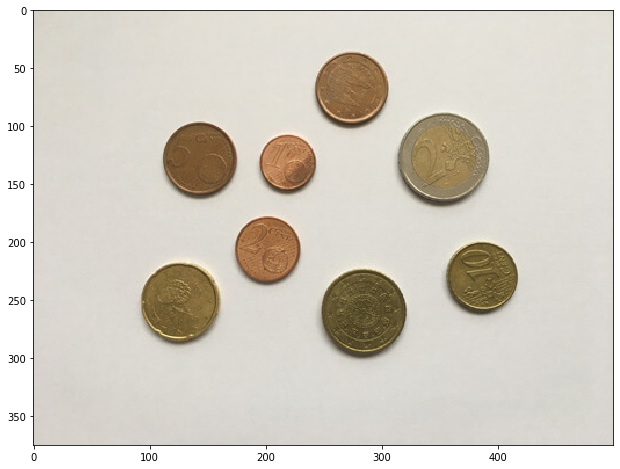

In [95]:
import numpy as np
import cv2
 
# Cargamos la imagen
monedas = cv2.imread("data/monedas.jpg")
monedas_ = cv2.cvtColor(monedas, cv2.COLOR_BGR2RGB)
plt.imshow(monedas_)
 


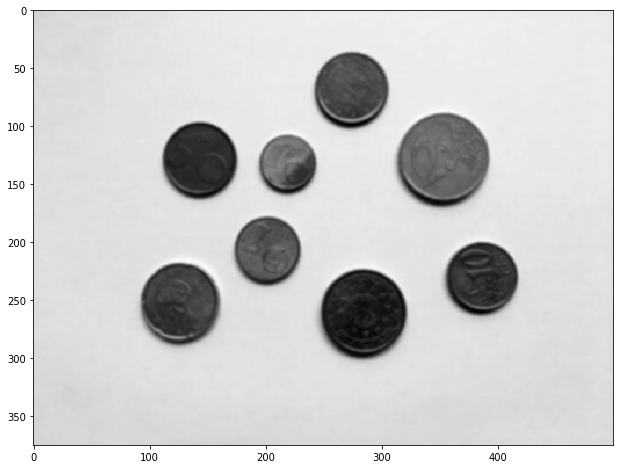

In [96]:
# Convertimos a escala de grises
gris = cv2.cvtColor(monedas, cv2.COLOR_BGR2GRAY)
 
# Aplicar suavizado Gaussiano
gauss = cv2.GaussianBlur(gris, (5,5), 0)
 
plt.imshow(gauss, cmap=plt.cm.gray)

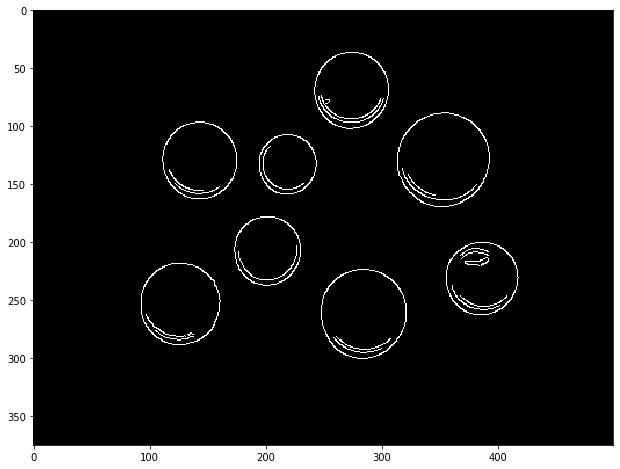

In [97]:
# Detectamos los bordes con Canny
canny = cv2.Canny(gauss, 50, 150) #Estos ultimos dos parametros son umbrales (max,min)
 
plt.imshow(canny, cmap=plt.cm.gray)

In [98]:
# Buscamos los contornos
_,contornos,_ = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 

In [99]:
len(contornos)

8